In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("diabetes.csv")

In [3]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
data["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [5]:
#hedef bağımlı değişkende dengesizlik var class_weight kullanacağız

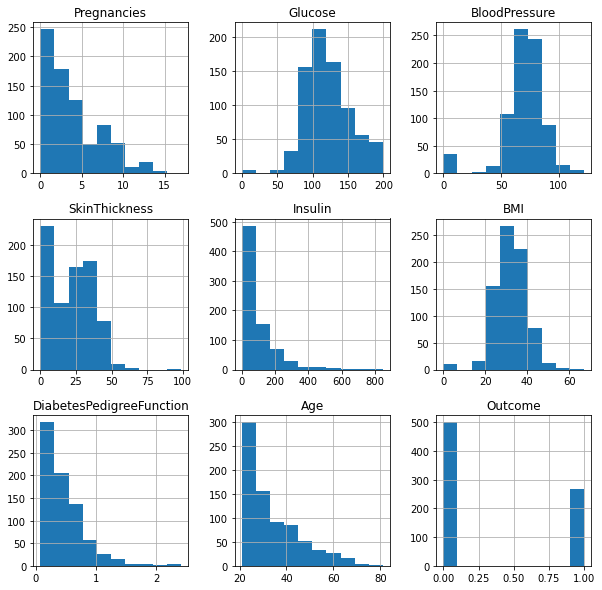

In [6]:
data.hist(figsize = (10,10));

In [7]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [8]:
#korelosyondan yola çıkarak BloodPressure ve SkinThickness hedef değişken ile anlamlı değil

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [10]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [12]:
data.groupby("Outcome")["Age"].value_counts()

Outcome  Age
0        22     61
         21     58
         24     38
         25     34
         23     31
                ..
1        55      1
         57      1
         61      1
         67      1
         70      1
Name: Age, Length: 96, dtype: int64

In [13]:
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from warnings import filterwarnings
filterwarnings('ignore')

In [14]:
y = data["Outcome"]
X = data.drop(['Outcome'], axis=1)
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [15]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

In [16]:
y_pred = lgbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7229437229437229

In [17]:
#f1 score = 2*(precision*recall)/(precision+recall)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78       151
           1       0.59      0.65      0.62        80

    accuracy                           0.72       231
   macro avg       0.70      0.71      0.70       231
weighted avg       0.73      0.72      0.73       231



In [18]:
##model tunning

In [19]:
lgbm_model

LGBMClassifier()

In [20]:
lgbm_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_child_samples": [5,10,20]}

In [21]:
lgbm = LGBMClassifier(class_weight = 'balanced')

lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, 
                             cv = 10, 
                             n_jobs = -1, 
                             verbose = 2)

In [22]:
#lgbm_cv_model.fit(X_train, y_train)

In [23]:
#lgbm_cv_model.best_params_

In [24]:
lgbm = LGBMClassifier(learning_rate = 0.01, 
                       max_depth = 3,
                       subsample = 0.6,
                       n_estimators = 500,
                       min_child_samples = 5)

In [25]:
lgbm_tuned = lgbm.fit(X_train,y_train)

In [26]:
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7619047619047619

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82       151
           1       0.65      0.66      0.66        80

    accuracy                           0.76       231
   macro avg       0.74      0.74      0.74       231
weighted avg       0.76      0.76      0.76       231



In [28]:
#LogisticRegression ile model kuralım

In [29]:
y = data["Outcome"]
X = data.drop(["Outcome"], axis=1)
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=0)

In [30]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
loj = sm.Logit(y, X)
loj_model= loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Tue, 28 Sep 2021   Pseudo R-squ.:                 0.05922
Time:                        23:45:25   Log-Likelihood:                -467.33
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.583e-10
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1284      0.029      4.484      0.000       0.072       0.185
Glucose                      0.0129      0.003      4.757      0.000       0.008       0.018
BloodPressure               -0.0303      0.005     -6.481      0.000      -0.039      -0.021
SkinThickness                0.0002      0.006      0.032      0.974      -0.012       0.012
Insulin                      0.0007      0.001      0.942      0.346      -0.001       0.002
BMI                         -0.0048      0.011     -0.449      0.653      -0.026       0.016
DiabetesPedigreeFunction     0.3203      0.240      1.335      0.182      -0.150       0.790
Age                         -0.0156      0.008     -1.852      0.064      -0.032       0.001
============================================================================================
"""

In [31]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X,y)
loj_model

LogisticRegression(solver='liblinear')

In [32]:
y_pred = loj_model.predict(X)

In [33]:
confusion_matrix(y, y_pred)

array([[448,  52],
       [121, 147]], dtype=int64)

In [34]:
accuracy_score(y, y_pred)

0.7747395833333334

In [35]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



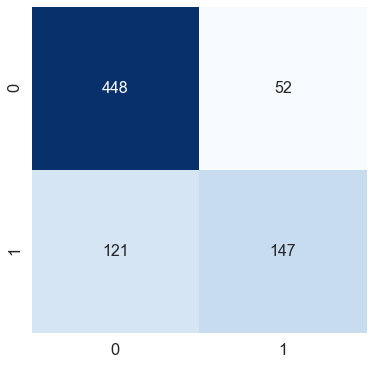

In [36]:
def conf_matrix(y, y_pred):    
    
    # Karışıklık matrisi oluşturma
    con_mat = confusion_matrix(y, y_pred)
    con_mat = pd.DataFrame(con_mat, range(2), range(2))
   
    #Karışıklık matrisini çizme
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5) 
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)
#Karışıklık matrisini çizme
conf_matrix(y, y_pred)

In [37]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

Test verileri için f1 puanı: 0.6823529411764706


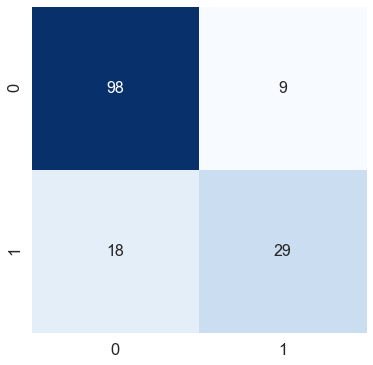

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

lr = LogisticRegression(solver='newton-cg')
lr.fit(X_train, y_train)

# Test verilerini tahmin etme
pred_test = lr.predict(X_test)

#f1 puanının hesaplanması ve yazdırılması 
f1_test = f1_score(y_test, pred_test)
print('Test verileri için f1 puanı:', f1_test)
# Karışıklık matrisi oluşturma işlevi 
def conf_matrix(y_test, pred_test):    
    
    # Karışıklık matrisi oluşturma
    con_mat = confusion_matrix(y_test, pred_test)
    con_mat = pd.DataFrame(con_mat, range(2), range(2))
   
    #Karışıklık matrisini çizme
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5) 
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)
#Karışıklık matrisini çizme
conf_matrix(y_test, pred_test)
#class weight ayarı yaptığımız için f1 skorumuz biraz daha iyileşti

In [39]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



Test verileri için f1 puanı: 0.6666666666666666


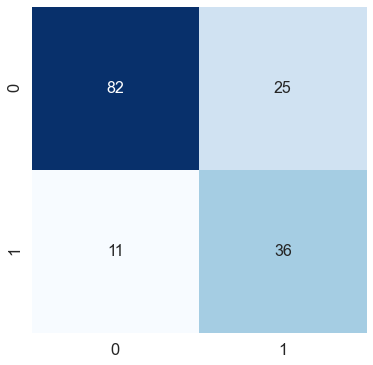

In [40]:
#modeli içe aktarma ve eğitme
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

lr = LogisticRegression(solver='newton-cg', class_weight='balanced')
lr.fit(X_train, y_train)

# Test verilerini tahmin etme
pred_test = lr.predict(X_test)

#f1 puanının hesaplanması ve yazdırılması 
f1_test = f1_score(y_test, pred_test)
print('Test verileri için f1 puanı:', f1_test)
# Karışıklık matrisi oluşturma işlevi 
def conf_matrix(y_test, pred_test):    
    
    # Karışıklık matrisi oluşturma
    con_mat = confusion_matrix(y_test, pred_test)
    con_mat = pd.DataFrame(con_mat, range(2), range(2))
   
    #Karışıklık matrisini çizme
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5) 
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)
#Karışıklık matrisini çizme
conf_matrix(y_test, pred_test)
#class weight ayarı yaptığımız için f1 skorumuz biraz daha iyileşti

In [41]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82       107
           1       0.59      0.77      0.67        47

    accuracy                           0.77       154
   macro avg       0.74      0.77      0.74       154
weighted avg       0.79      0.77      0.77       154

